In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [6]:
def preprocess_image(image):
    image = tf.image.rgb_to_grayscale(image)
    return image


Loading Images

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            "train",
            shuffle=True,
            image_size=(256,256),
            batch_size=32
        )

Found 7771 files belonging to 4 classes.


Discover batches which loaded in

In [8]:
for image_per_batch, label_per_batch in dataset.take(1):
    print(image_per_batch.shape)
    print(label_per_batch.numpy())

(32, 256, 256, 3)
[1 2 0 2 0 1 1 3 1 2 1 2 0 2 1 0 0 1 2 1 0 2 2 0 3 1 3 0 3 0 0 1]


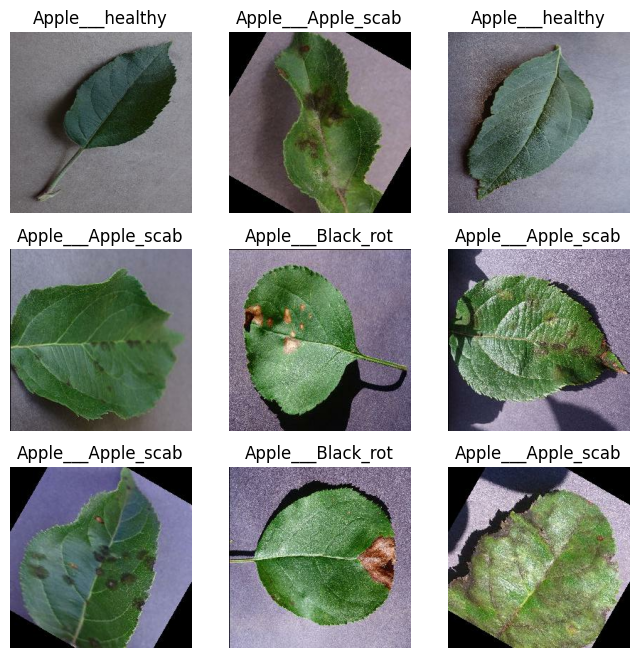

In [9]:
plt.figure(figsize=(8,8))
for image_per_batch, label_per_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_per_batch[i].numpy().astype(int))
        plt.title(dataset.class_names[label_per_batch[i]])
        plt.axis("off")

In [10]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VALID_RATIO = 0.1

In [11]:
len(dataset)*TRAIN_RATIO

194.4

In [12]:
train = dataset.take(194)
test = dataset.skip(194)

In [13]:
len(dataset) * TEST_RATIO

24.3

In [14]:
valid = test.skip(24)

In [15]:
test = test.take(24)

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

In [25]:
model= Sequential()

model.add(tf.keras.layers.Resizing(128,128))
model.add(tf.keras.layers.Rescaling(1./255.))


model.add(Conv2D(32,(3,3), input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(6,activation=tf.nn.softmax))

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
modelhistory = model.fit(train, batch_size = 32, verbose =1, epochs=10, validation_data = valid)

Epoch 1/10


194/194 [==============================] - 67s 338ms/step - loss: 0.6284 - accuracy: 0.7423 - val_loss: 0.3683 - val_accuracy: 0.8667
Epoch 2/10
194/194 [==============================] - 52s 267ms/step - loss: 0.2710 - accuracy: 0.9030 - val_loss: 0.1959 - val_accuracy: 0.9358
Epoch 3/10
194/194 [==============================] - 54s 278ms/step - loss: 0.1961 - accuracy: 0.9270 - val_loss: 0.1523 - val_accuracy: 0.9472
Epoch 4/10
194/194 [==============================] - 52s 265ms/step - loss: 0.1262 - accuracy: 0.9555 - val_loss: 0.2826 - val_accuracy: 0.9170
Epoch 5/10
194/194 [==============================] - 52s 269ms/step - loss: 0.1403 - accuracy: 0.9494 - val_loss: 0.2613 - val_accuracy: 0.8994
Epoch 6/10
194/194 [==============================] - 52s 267ms/step - loss: 0.0690 - accuracy: 0.9757 - val_loss: 0.0966 - val_accuracy: 0.9648
Epoch 7/10
194/194 [==============================] - 53s 271ms/step - loss: 0.0650 - accuracy: 0.9776 - val_loss: 0.0907 - val_accuracy: 0.9

In [20]:
modelmetrics = model.evaluate(test)

24/24 [==============================] - 5s 78ms/step - loss: 0.0882 - accuracy: 0.9714


In [21]:
train_loss = modelhistory.history['loss']
val_loss = modelhistory.history['val_loss']
train_accuracy = modelhistory.history['accuracy']
val_accuracy = modelhistory.history['val_accuracy']

In [22]:
y_pred = model.predict(valid)

25/25 [==============================] - 6s 71ms/step


In [23]:
modelCSV = pd.DataFrame(modelhistory.history)
modelCSV.to_csv('Resize128&Normalization.csv')

In [26]:
confMatrix = confusion_matrix(valid,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [25, 795]

In [24]:
metricsCSV = pd.Dataframe(columns=['name','accuracy','f1score','recall','precision','tpr','tnr'])

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix



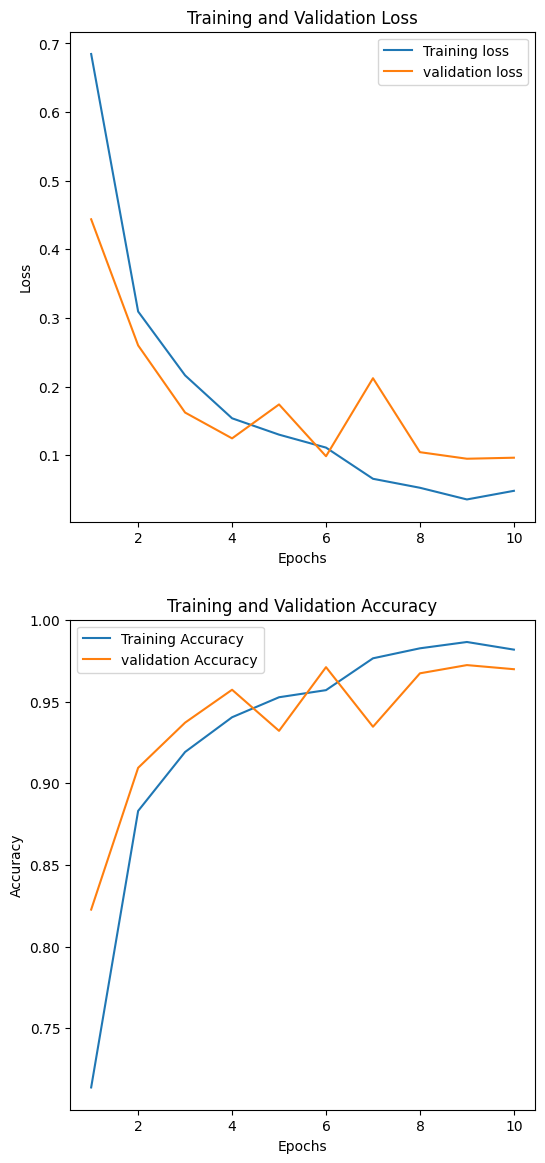

In [ ]:
epochs = range(1,11)
plt.figure(figsize=(6,14))

plt.subplot(2,1,1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2,1,2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()